In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from funciones_toolbox_ml_final import *
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# CLASIFICACIÓN

### Cargamos el dataset que usaremos para el modelo de clasificación

In [2]:
df_bank = pd.read_csv('./data/bank.csv')
df_bank.head(10)

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
5  unknown    5   may       562         2     -1         0  unknown     yes  
6  unknown    6   may      1201         1     -1         0  unknown     yes  
7  unknown    6   may      1030         1     -1         0  unknown     yes  
8  unknown    6   may       608         1     -1         0  unknown     yes  
9  unknown    6   may      1297         3     -1         0  unknown     yes

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
tipifica_variables(df_bank,15, 30)

nombre_variable      tipo_sugerido
0              age  Numerica Discreta
1              job         Categorica
2          marital         Categorica
3        education         Categorica
4          default            Binaria
5          balance  Numerica Continua
6          housing            Binaria
7             loan            Binaria
8          contact         Categorica
9              day  Numerica Discreta
10           month         Categorica
11        duration  Numerica Discreta
12        campaign  Numerica Discreta
13           pdays  Numerica Discreta
14        previous  Numerica Discreta
15        poutcome         Categorica
16         deposit            Binaria

In [5]:
describe_df(df_bank)

age       job   marital education   default  \
Tipo                        int64    object    object    object    object   
Porcentaje_Nulos              0.0       0.0       0.0       0.0       0.0   
Valores_Unicos                 76        12         3         4         2   
Porcentaje_Cardinalidad  0.680882  0.107508  0.026877  0.035836  0.017918   

                           balance   housing      loan   contact       day  \
Tipo                         int64    object    object    object     int64   
Porcentaje_Nulos               0.0       0.0       0.0       0.0       0.0   
Valores_Unicos                3805         2         2         3        31   
Porcentaje_Cardinalidad  34.088873  0.017918  0.017918  0.026877  0.277728   

                            month   duration  campaign     pdays  previous  \
Tipo                       object      int64     int64     int64     int64   
Porcentaje_Nulos              0.0        0.0       0.0       0.0       0.0   
Valores_Unicos                 12       1428        36       472        34   
Porcentaje_Cardinalidad  0.107508  12.793406  0.322523  4.228633  0.304605   

                         poutcome   deposit  
Tipo                       object    object  
Porcentaje_Nulos              0.0       0.0  
Valores_Unicos                  4         2  
Porcentaje_Cardinalidad  0.035836  0.017918

### Dividimos en train y test y seleccionamos el target

In [6]:
train_set, test_set = train_test_split(df_bank, test_size = 0.2, random_state = 42)
target = "deposit"

### Hacemos la selección de features

In [7]:
get_features_num_classification(train_set,target)

Todas las columnas pasaron el test de significancia.

 Las siguientes columnas pasaron el test de significancia:


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Todas las columnas pasaron el test de significancia.

 Las siguientes columnas pasaron el test de significancia:


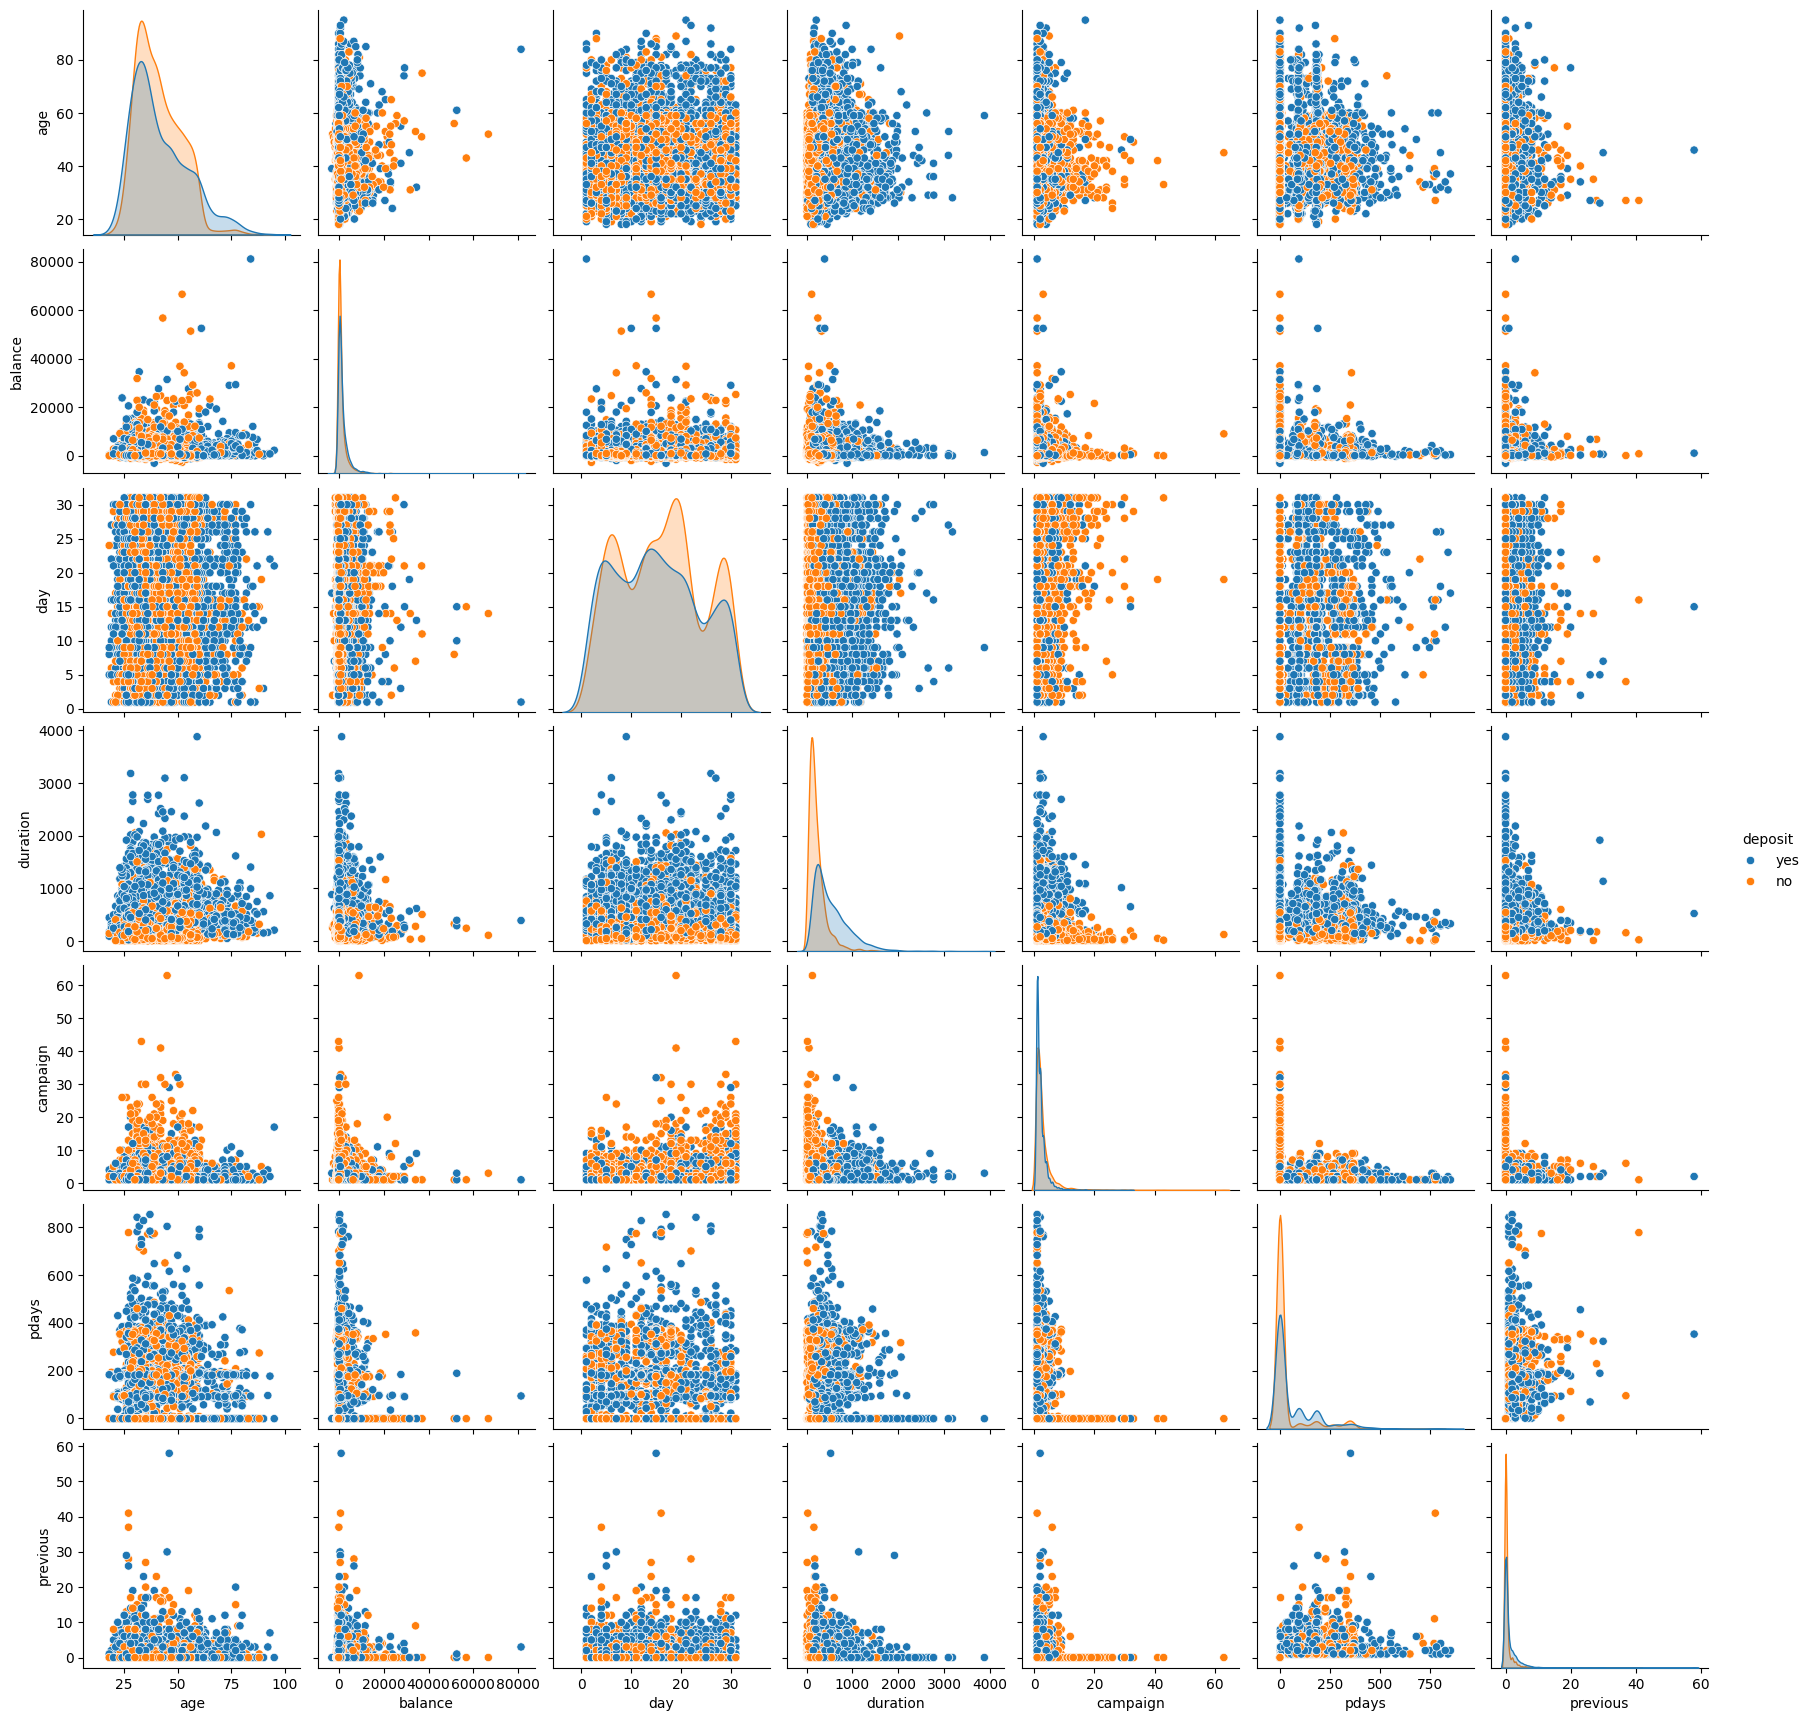

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
plot_features_cat_classification(train_set,target)

- Aqui hay que meter las funciones que suba alvaro

### Creamos el modelo

In [10]:
df_numerical = train_set.select_dtypes(include=[np.number])
df_numerical['deposit'] = df_bank['deposit'].map({'yes': 1, 'no': 0})


In [11]:
X = df_numerical.drop('deposit', axis=1)
y = df_numerical['deposit']

dt = DecisionTreeClassifier(max_depth= 10, random_state=42)
dt.fit(X, y)

df_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)


In [12]:
# Nos quedamos con las 4 variables más importantes
X = df_numerical[df_feature_importances['feature'].values[:4]]

In [13]:
X_train = train_set[X.columns]
y_train = train_set[target]

X_test = test_set[X.columns]
y_test = test_set[target]

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [15]:
#target ---->>  y_test
#predicciones target ----->>  y_pred

In [16]:
eval_model(y_test,y_pred,"clasificación",["RECALL","PRECISION"])

Recall: 0.7262647875369136
Precision: 0.7339797190590973


(0.7262647875369136, 0.7339797190590973)

# REGRESIÓN

### Cargamos el dataset para crear un modelo de regresión

In [17]:
df_temps = pd.read_csv('./data/temps.csv')
df_temps.head(10)

year  month  day   week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1    Fri      45      45     45.6      45             43   
1  2016      1    2    Sat      44      45     45.7      44             41   
2  2016      1    3    Sun      45      44     45.8      41             43   
3  2016      1    4    Mon      44      41     45.9      40             44   
4  2016      1    5   Tues      41      40     46.0      44             46   
5  2016      1    6    Wed      40      44     46.1      51             43   
6  2016      1    7  Thurs      44      51     46.2      45             45   
7  2016      1    8    Fri      51      45     46.3      48             43   
8  2016      1    9    Sat      45      48     46.4      50             46   
9  2016      1   10    Sun      48      50     46.5      52             45   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
5            49              48      40  
6            49              46      38  
7            47              46      34  
8            50              45      47  
9            48              48      49

In [18]:
describe_df(df_temps)

year     month       day      week     temp_2  \
Tipo                        int64     int64     int64    object      int64   
Porcentaje_Nulos              0.0       0.0       0.0       0.0        0.0   
Valores_Unicos                  1        12        31         7         56   
Porcentaje_Cardinalidad  0.287356  3.448276  8.908046  2.011494  16.091954   

                            temp_1    average     actual forecast_noaa  \
Tipo                         int64    float64      int64         int64   
Porcentaje_Nulos               0.0        0.0        0.0           0.0   
Valores_Unicos                  56        243         55            37   
Porcentaje_Cardinalidad  16.091954  69.827586  15.804598     10.632184   

                        forecast_acc forecast_under     friend  
Tipo                           int64          int64      int64  
Porcentaje_Nulos                 0.0            0.0        0.0  
Valores_Unicos                    37             36         66  
Porcentaje_Cardinalidad    10.632184      10.344828  18.965517

In [19]:
tipifica_variables(df_temps,15, 30)

nombre_variable      tipo_sugerido
0             year         Categorica
1            month         Categorica
2              day  Numerica Discreta
3             week         Categorica
4           temp_2  Numerica Discreta
5           temp_1  Numerica Discreta
6          average  Numerica Continua
7           actual  Numerica Discreta
8    forecast_noaa  Numerica Discreta
9     forecast_acc  Numerica Discreta
10  forecast_under  Numerica Discreta
11          friend  Numerica Discreta

In [20]:
df_temps = pd.get_dummies(df_temps).drop(columns=['year'])

### Creamos el juego de train y test

In [21]:
y = df_temps['actual']
X = df_temps.drop('actual', axis=1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y,test_size=0.25,random_state=42)

### Selección de features

In [22]:
get_features_num_regression(df_temps, "actual", 0.1,pvalue=0.05)

['temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

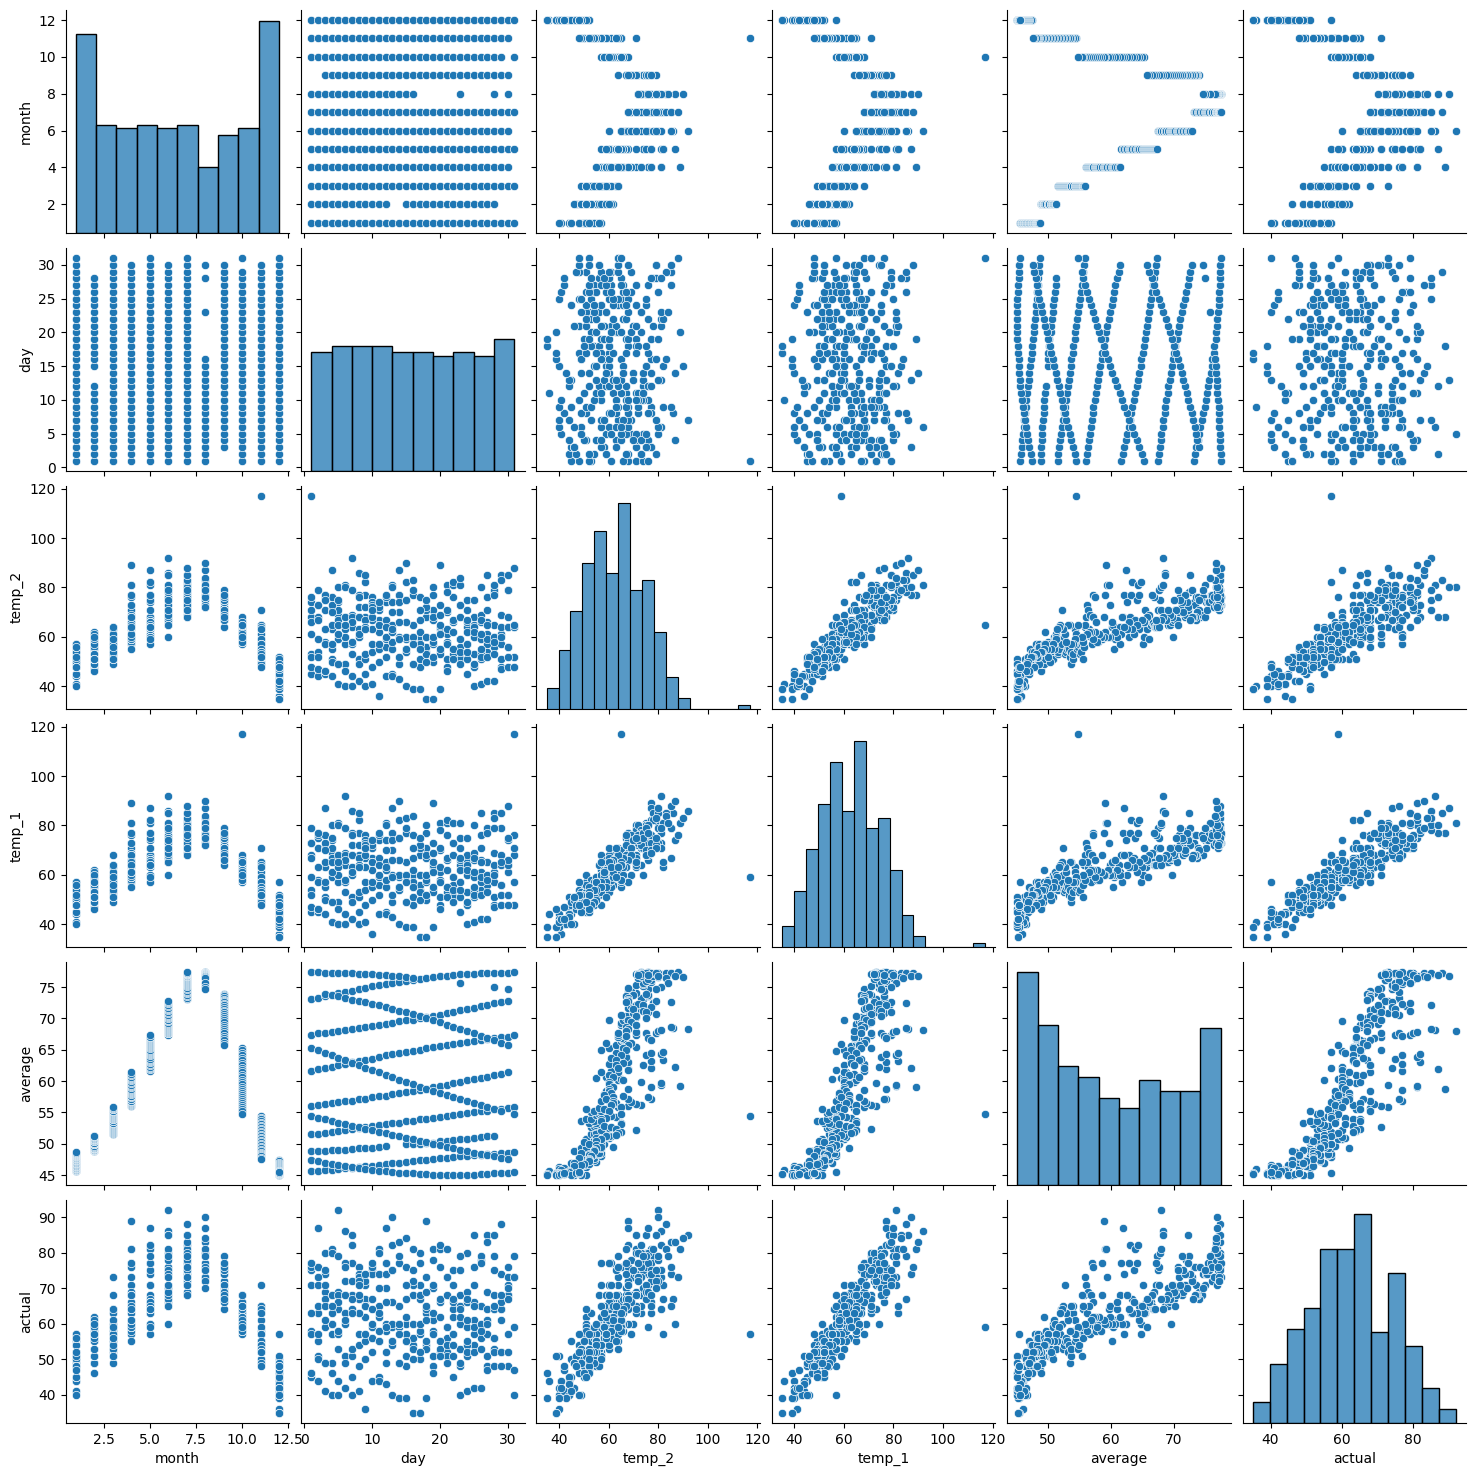

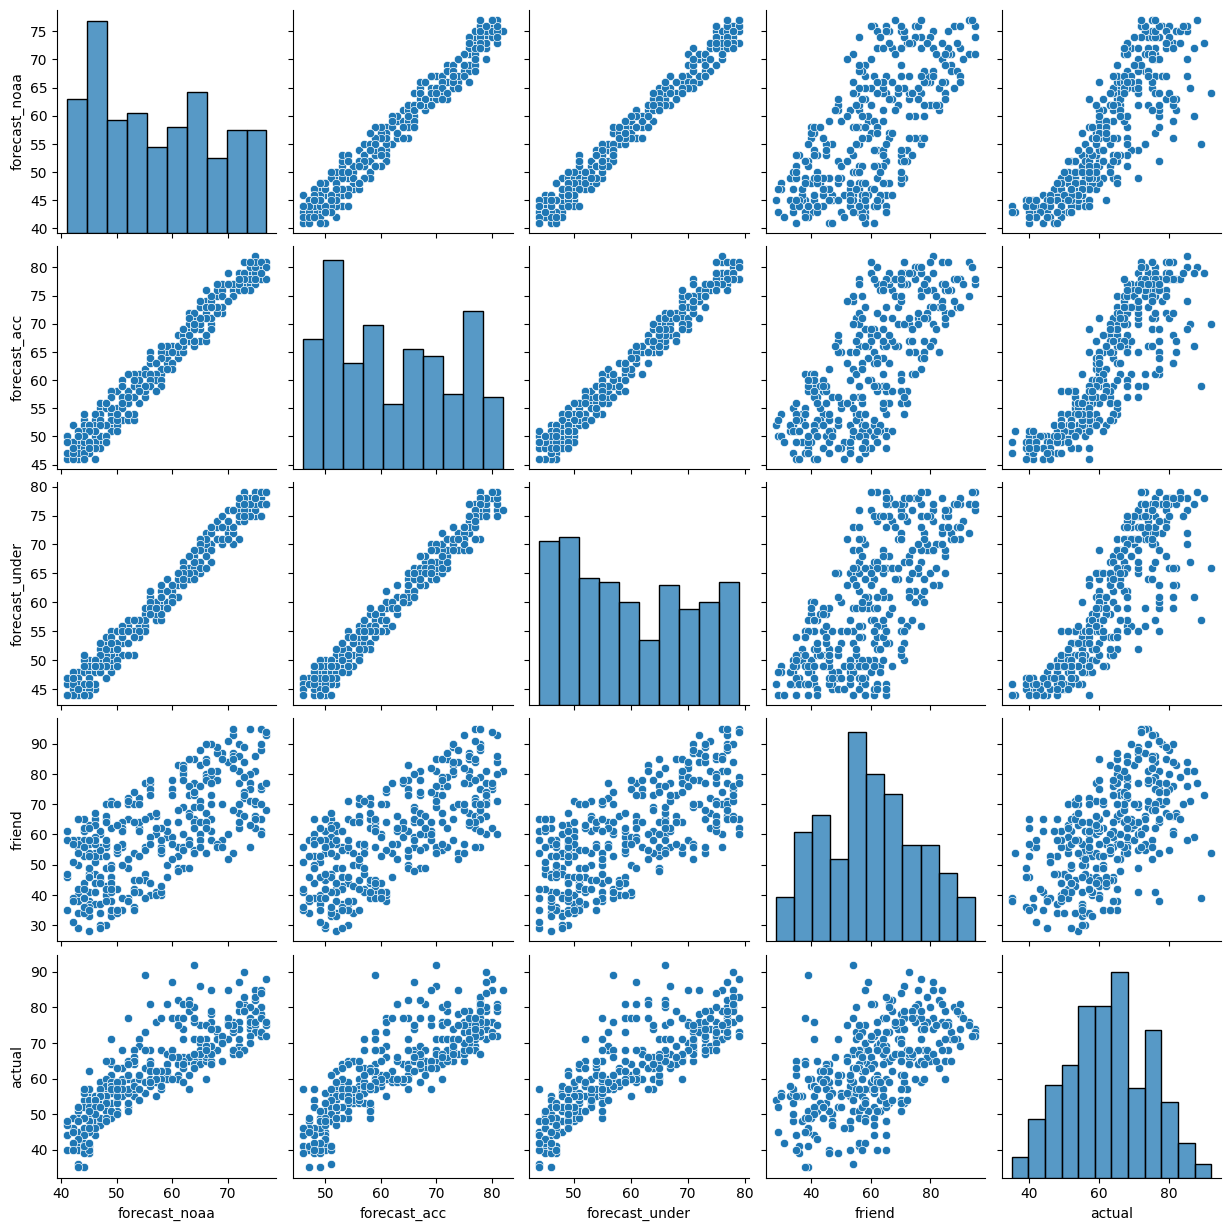

['month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

In [23]:
plot_features_num_regression(df_temps, target_col="actual", columns=[], umbral_corr=0, pvalue=None)

In [24]:
get_features_cat_regression(df_temps,"",pvalue=0.05, cardinality_threshold=10)


La columna '' no existe en el DataFrame.


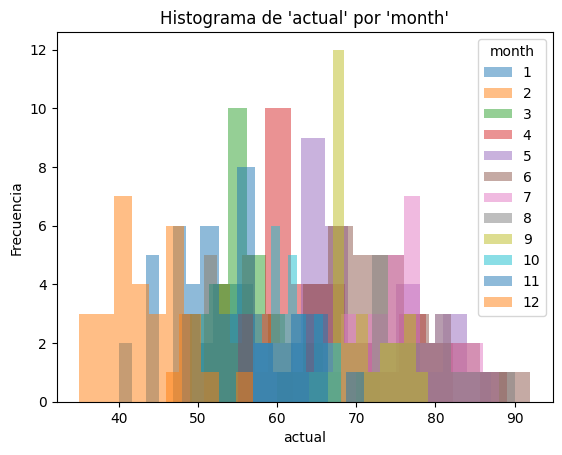

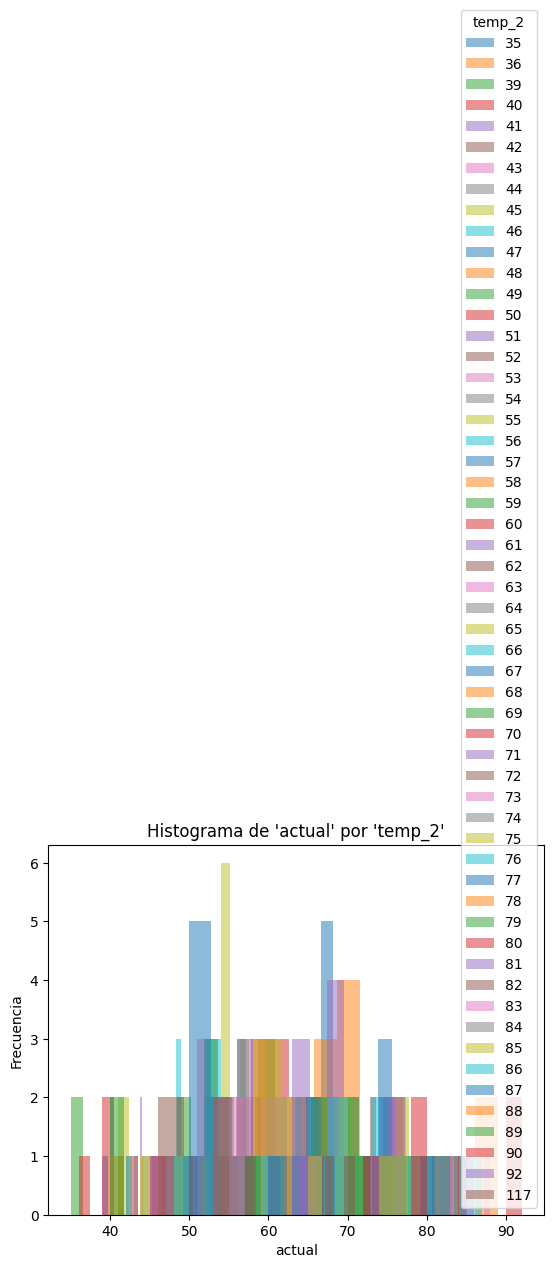

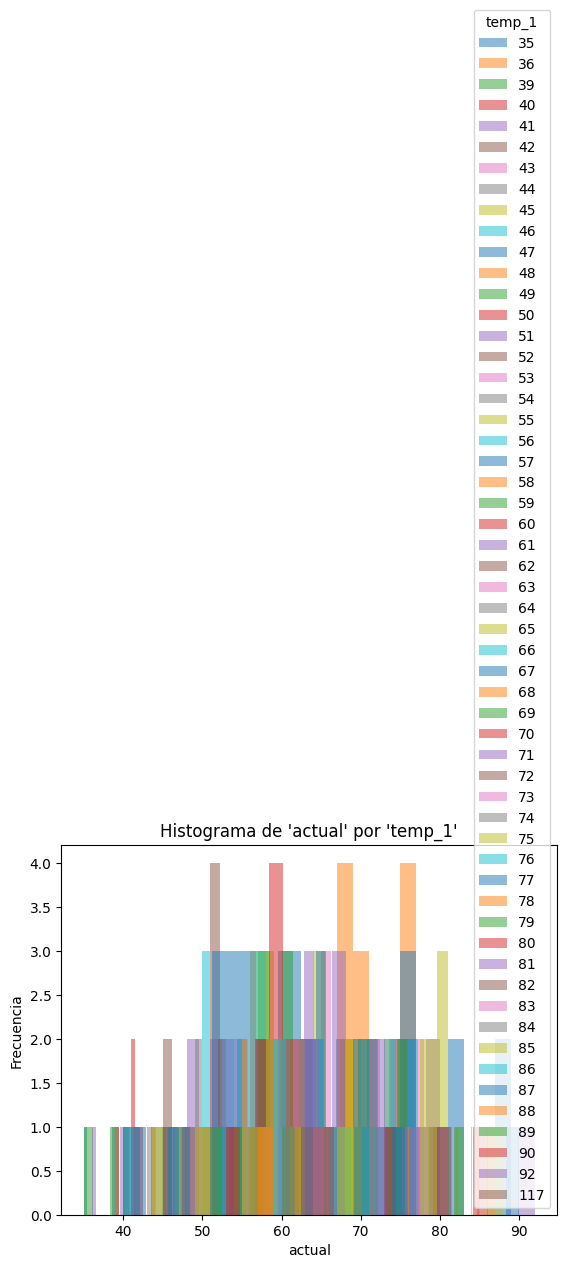

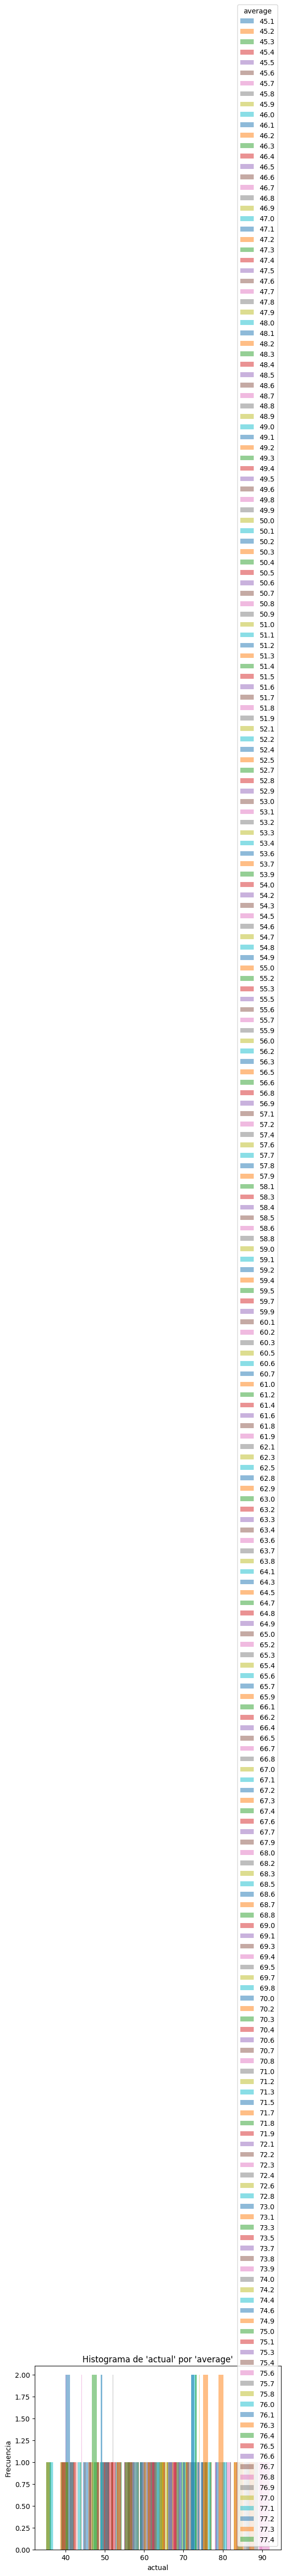

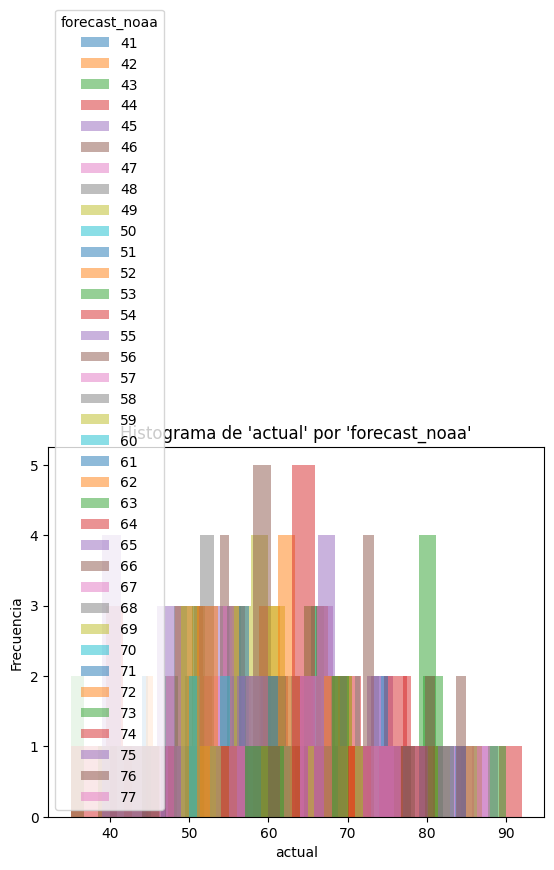

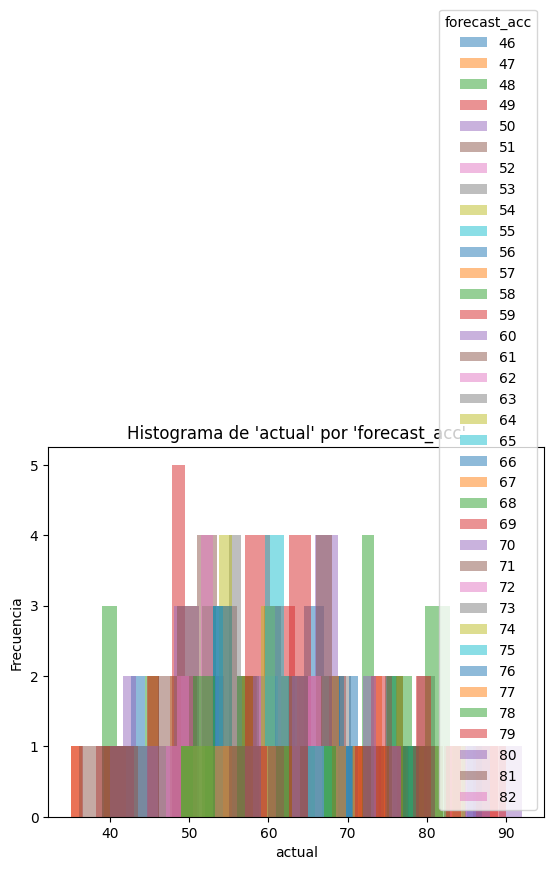

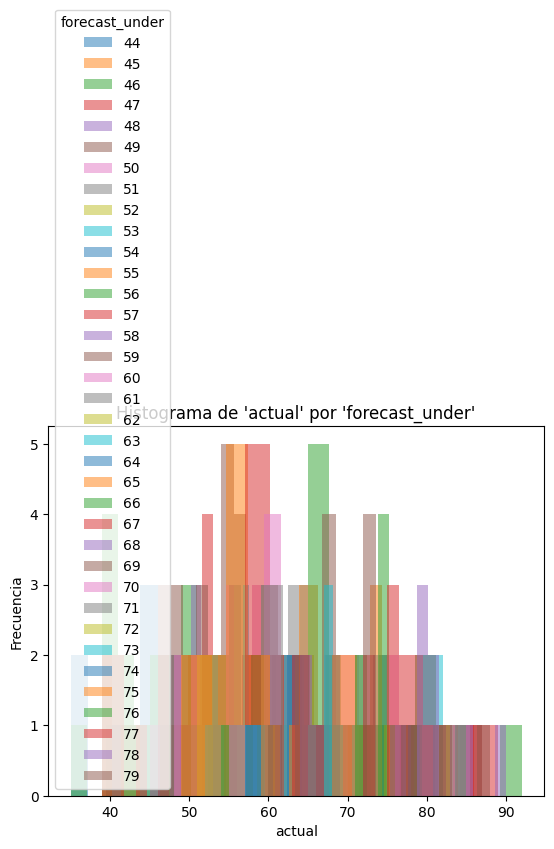

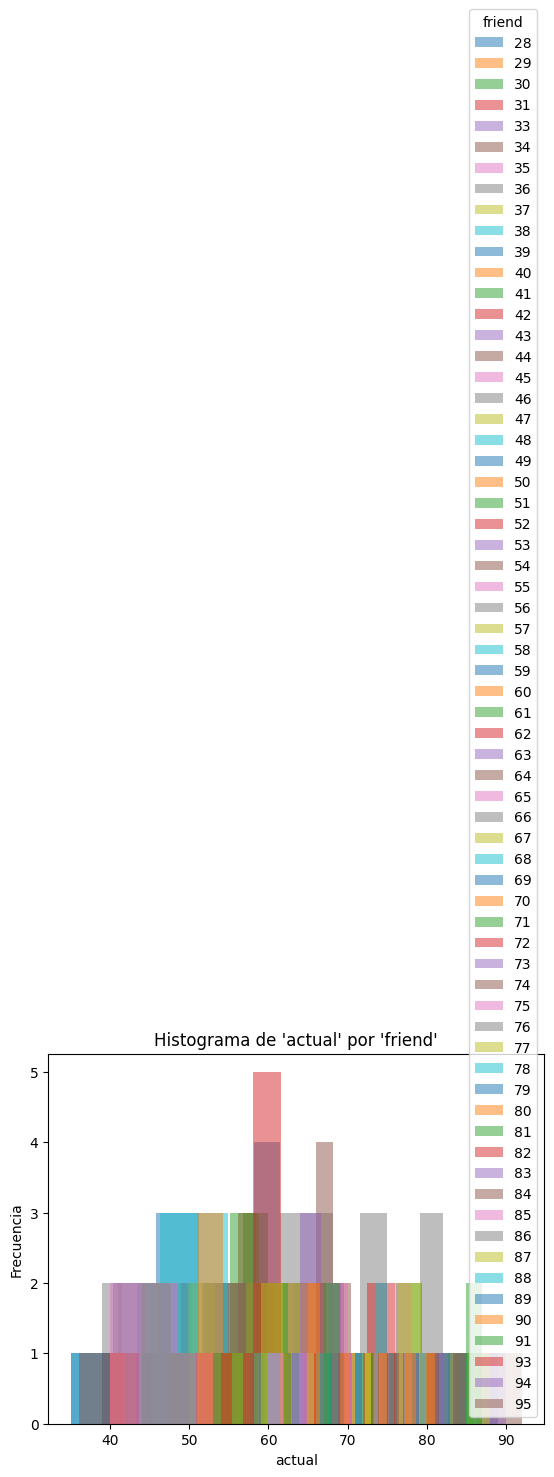

['month',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

In [25]:
plot_features_cat_regression(df_temps,"actual", with_individual_plot=True)

### Creamos el modelo

In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_reg,y_train_reg)
y_pred_reg = dtr.predict(X_test_reg)


In [27]:
#target ---->>  y_test_reg
#predicciones target ----->>  y_pred_reg

MAE: 5.689655172413793
MAPE: 0.08865590449982635


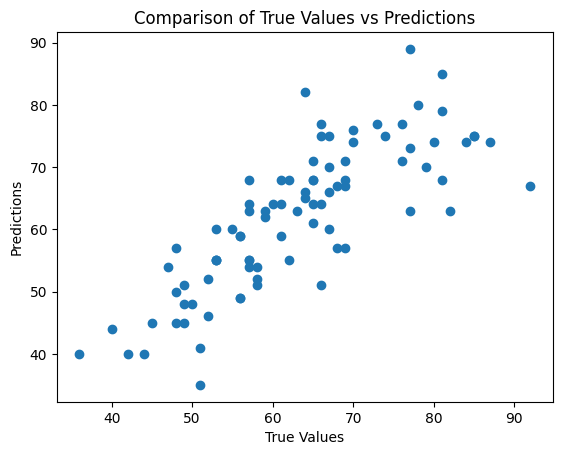

(5.689655172413793, 0.08865590449982635)

In [28]:
eval_model(y_test_reg,y_pred_reg,"regresión",["MAE","MAPE","GRAPH"])

## OTROS EJEMPLOS

In [29]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.dropna(inplace=True)

In [30]:
get_features_num_classification(df_titanic, "sex")

Las siguientes columnas no pasaron el test de significancia:
['pclass', 'sibsp', 'parch', 'fare', 'alone']

 Las siguientes columnas pasaron el test de significancia:


['survived', 'age', 'adult_male']

In [31]:
df_vinos = pd.read_csv("./data/wines_dataset.csv", sep="|")
df_vinos.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  
2     11.2        7  white  
3     10.5        3  white  
4      9.8        6    red

In [32]:
get_features_num_classification(df_vinos, "quality")

Las siguientes columnas no pasaron el test de significancia:
['pH']

 Las siguientes columnas pasaron el test de significancia:


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

Las siguientes columnas no pasaron el test de significancia:
['pH']

 Las siguientes columnas pasaron el test de significancia:


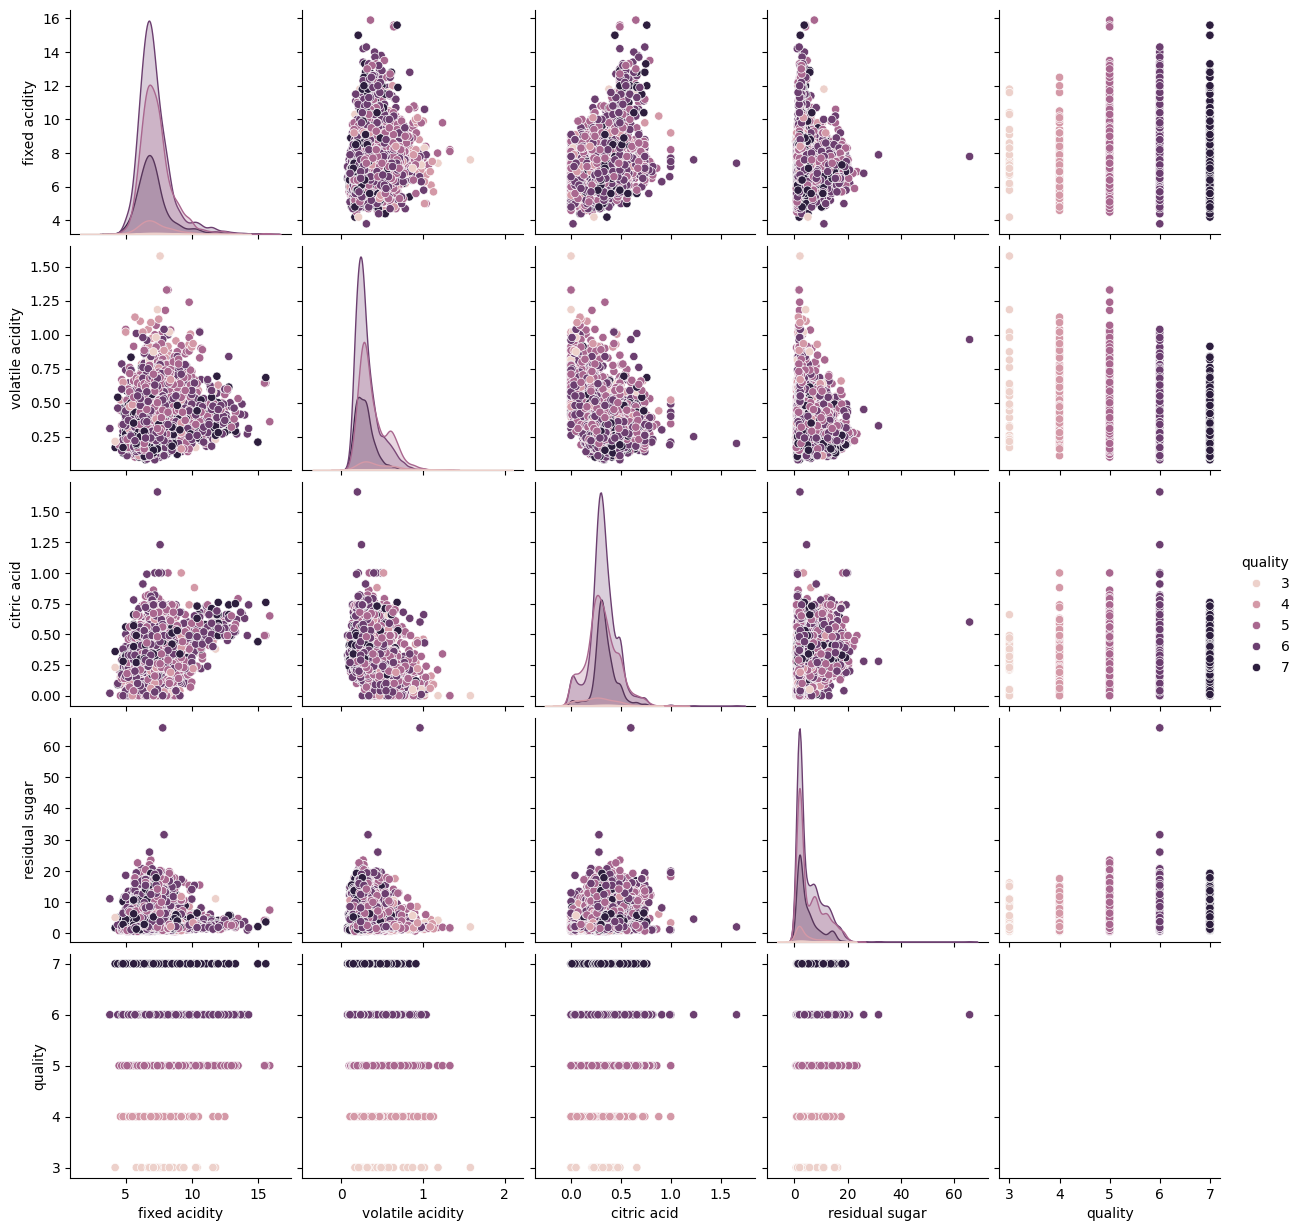

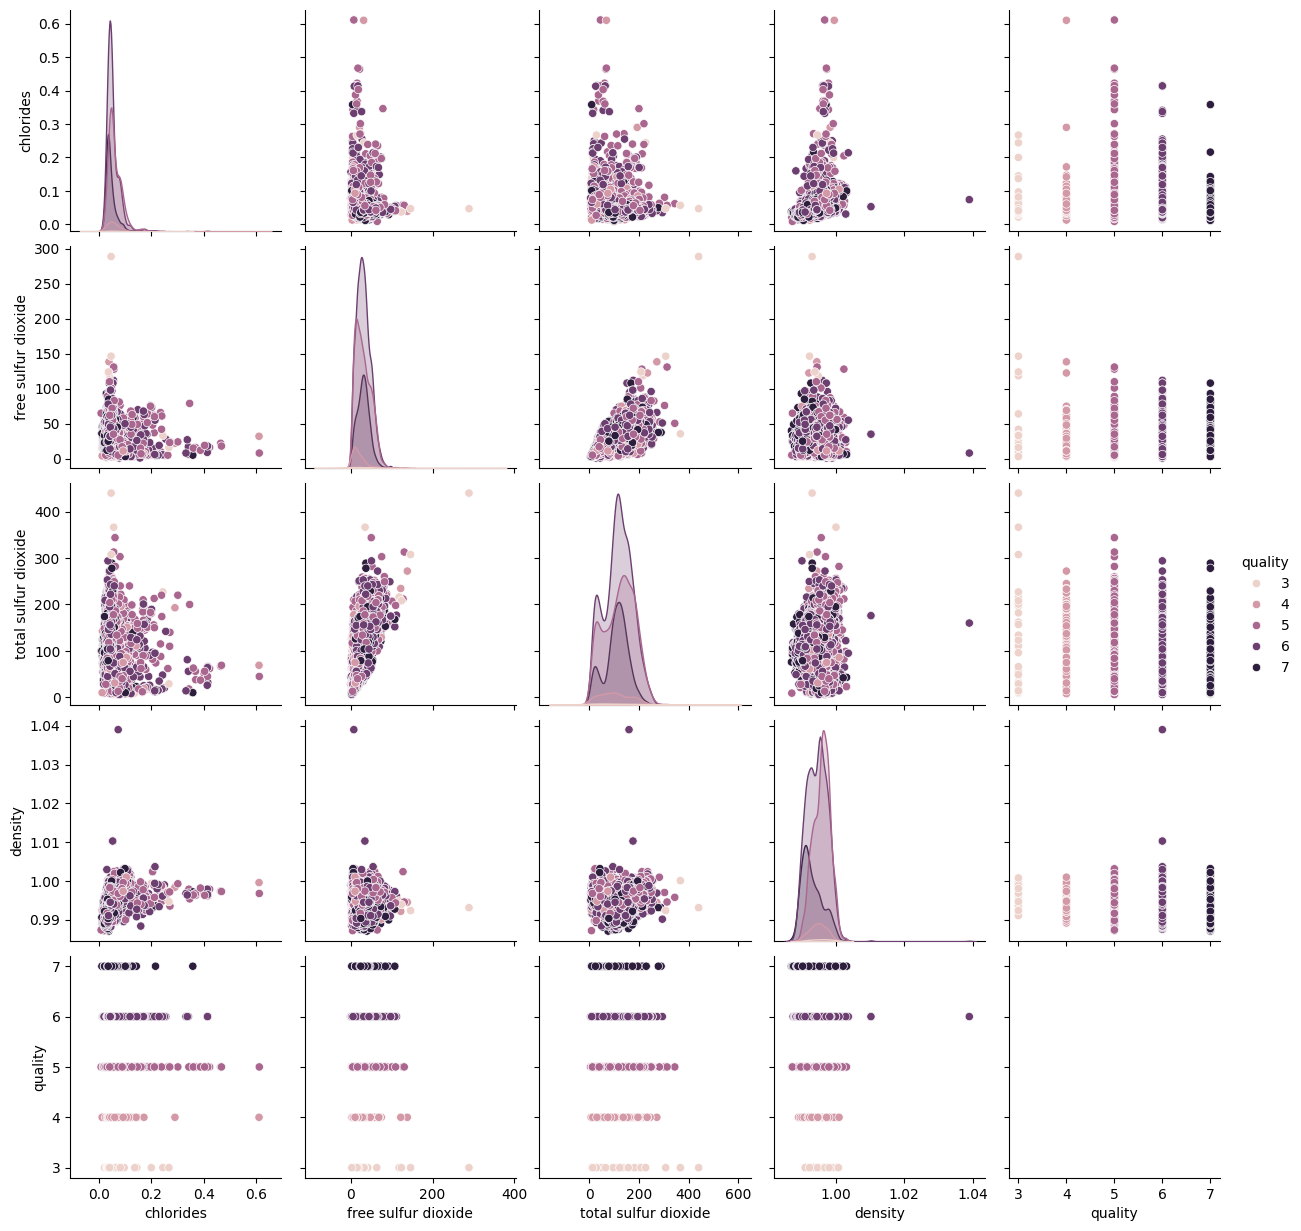

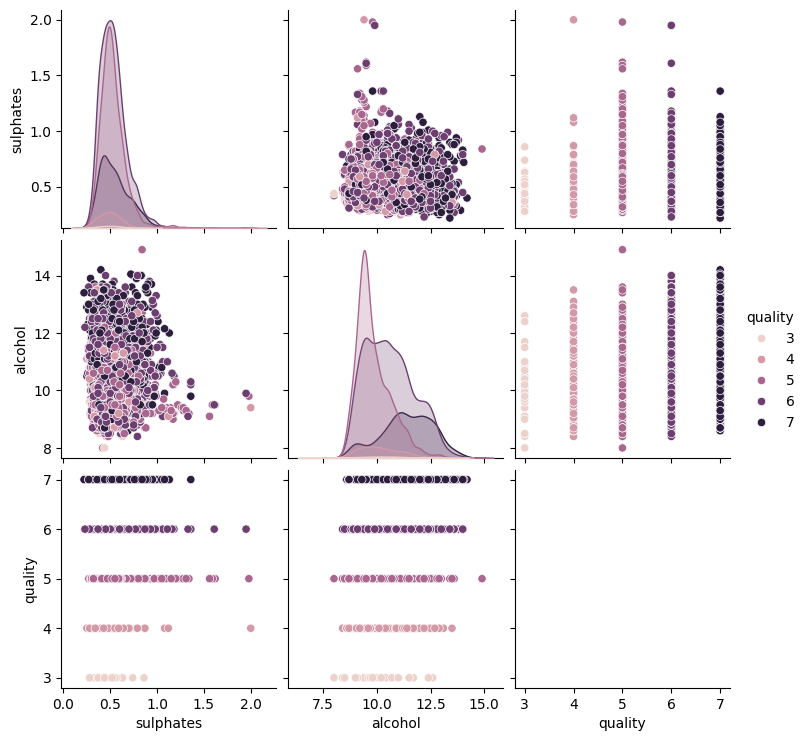

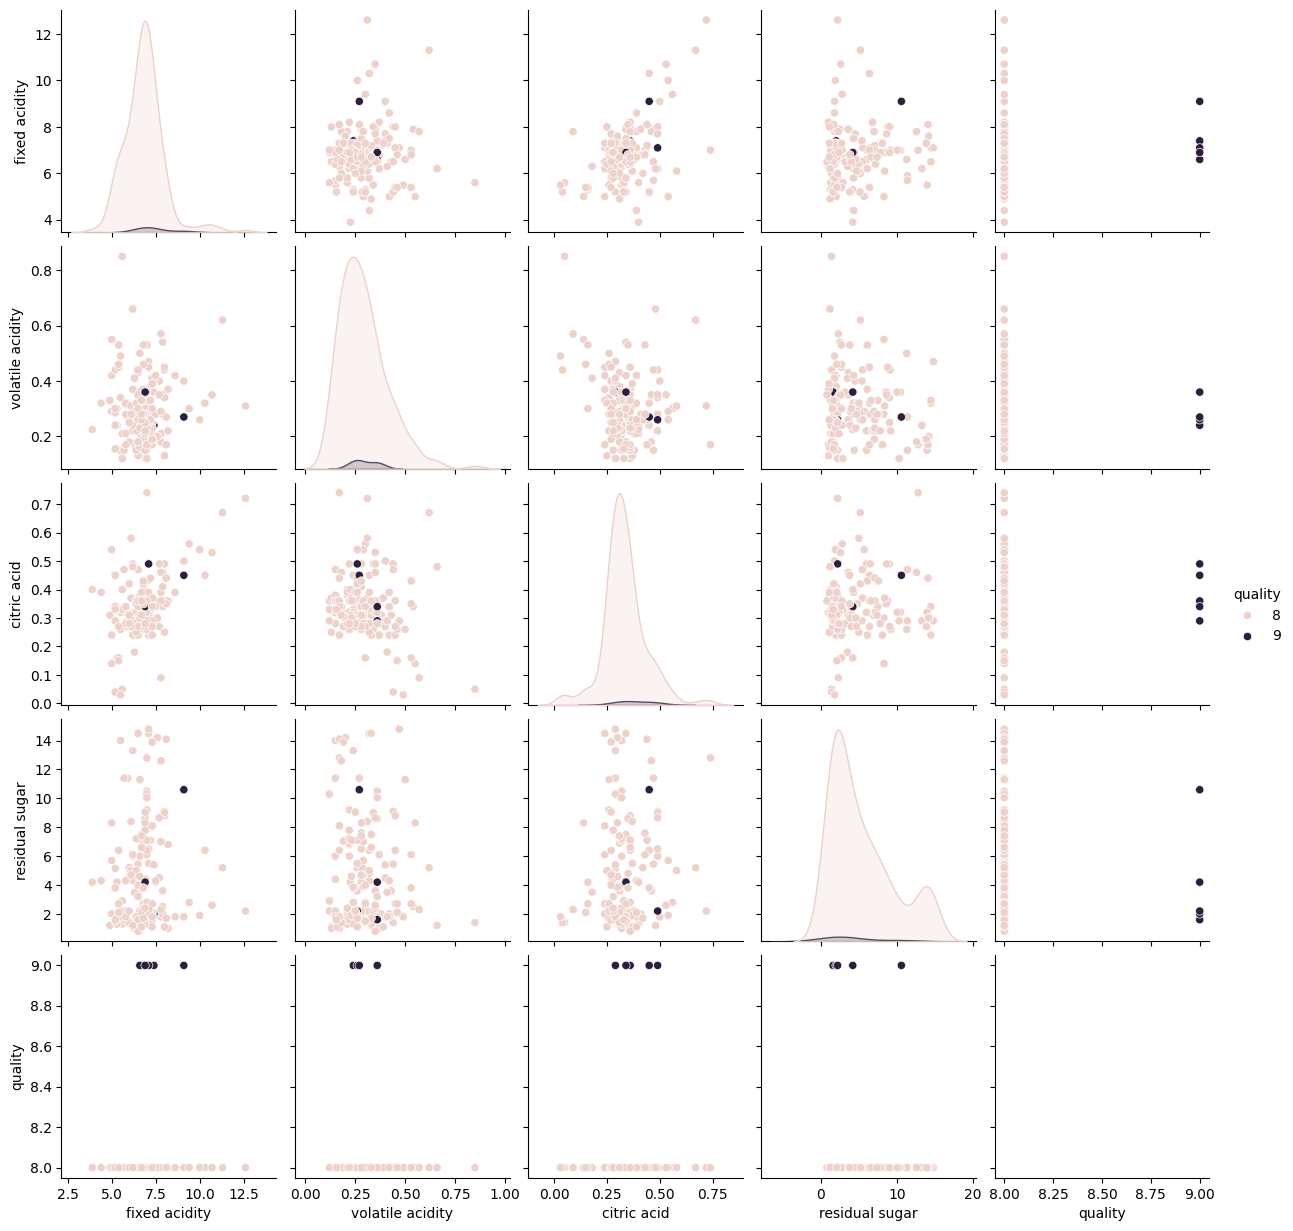

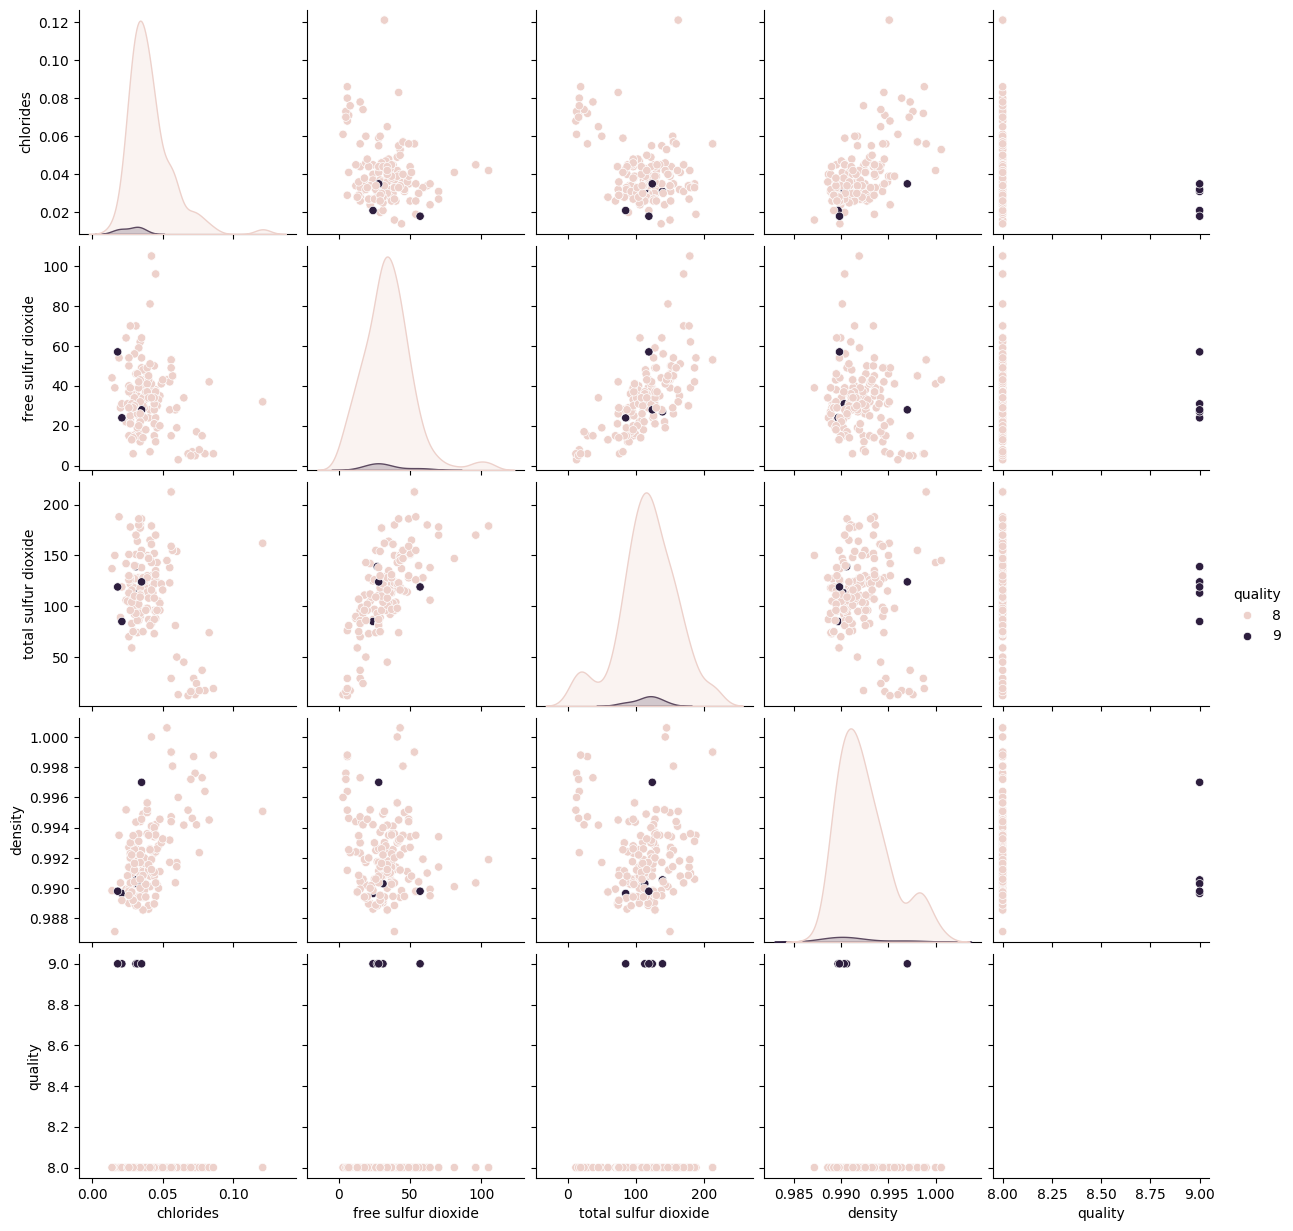

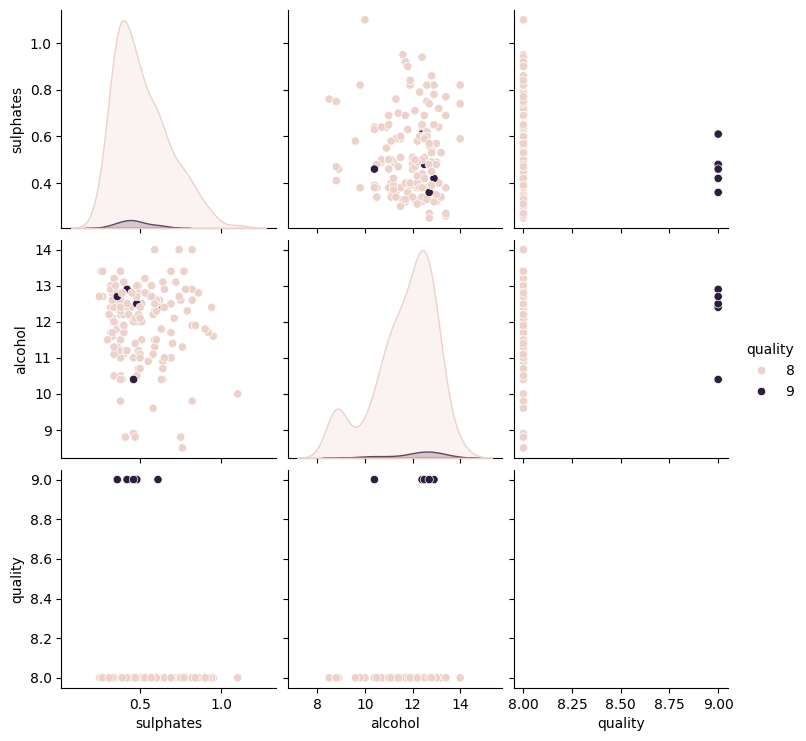

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [33]:
plot_features_cat_classification(df_vinos, "quality")